In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Master_Loan_Summary.csv")
data = data[data["data_source"] == "Lending Club"]
data.drop('data_source',axis=1, inplace=True)

c:\users\jorge\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
data = pd.read_csv("Loans.csv")

In [ ]:
for cols in data.columns:
    print(cols)
    print(data[cols].value_counts())

In [ ]:
grade = data.groupby("grade").count()["borrower_rate"]

grade.plot()
plt.show()

In [3]:
data.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,10149342,27050.0,36,0.1099,885.46,B,2013-12-01T00:00,debt_consolidation,0.0,27050.0,4702.53,0.0,0.0,2016-07-01T00:00,2016-08-01T00:00,0,COMPLETED,Lending Club
1,10149488,4800.0,36,0.1099,157.13,B,2013-12-01T00:00,home_improvement,0.0,4800.0,357.52,0.0,0.0,2014-09-01T00:00,2014-10-01T00:00,0,COMPLETED,Lending Club
2,10148122,12000.0,36,0.0762,373.94,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1397.54,0.0,0.0,2016-06-01T00:00,2016-07-01T00:00,0,COMPLETED,Lending Club
3,10119623,12000.0,36,0.1199,398.52,B,2013-12-01T00:00,debt_consolidation,0.0,12000.0,2346.48,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club
4,10159498,12000.0,36,0.0662,368.45,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1263.95,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loan_number                  int64  
 1   amount_borrowed              float64
 2   term                         int64  
 3   borrower_rate                float64
 4   installment                  float64
 5   grade                        object 
 6   origination_date             object 
 7   listing_title                object 
 8   principal_balance            float64
 9   principal_paid               float64
 10  interest_paid                float64
 11  late_fees_paid               float64
 12  debt_sale_proceeds_received  float64
 13  last_payment_date            object 
 14  next_payment_due_date        object 
 15  days_past_due                int64  
 16  loan_status_description      object 
 17  data_source                  object 
dtypes: float64(8), int64(3), object(7)
memory 

In [5]:
data.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
count,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06
mean,5.076601e+07,1.447258e+04,4.294869e+01,1.382498e-01,4.335797e+02,4.944927e+03,8.433969e+03,2.214817e+03,2.622497e+00,7.711331e+01,7.390529e+01
std,4.813839e+07,8.763608e+03,1.089006e+01,5.515687e-02,2.565165e+02,7.528232e+03,7.940062e+03,2.430349e+03,2.124300e+01,5.337221e+02,2.221053e+02
min,5.571600e+04,1.000000e+03,1.200000e+01,5.310000e-02,4.930000e+00,0.000000e+00,-1.500000e+01,-8.255100e+00,-9.500000e-09,0.000000e+00,0.000000e+00
25%,8.654122e+05,8.000000e+03,3.600000e+01,9.920000e-02,2.481491e+02,0.000000e+00,2.250702e+03,6.334700e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.516220e+07,1.200000e+04,3.600000e+01,1.299000e-01,3.732400e+02,0.000000e+00,6.000000e+03,1.425910e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.391978e+07,2.000000e+04,6.000000e+01,1.677000e-01,5.718100e+02,7.973770e+03,1.200000e+04,2.891568e+03,0.000000e+00,0.000000e+00,6.000000e+01
max,1.360671e+08,4.000000e+04,6.000000e+01,3.192000e-01,2.251506e+03,4.000000e+04,4.000000e+04,2.788480e+04,1.676850e+03,3.985955e+04,2.402000e+03


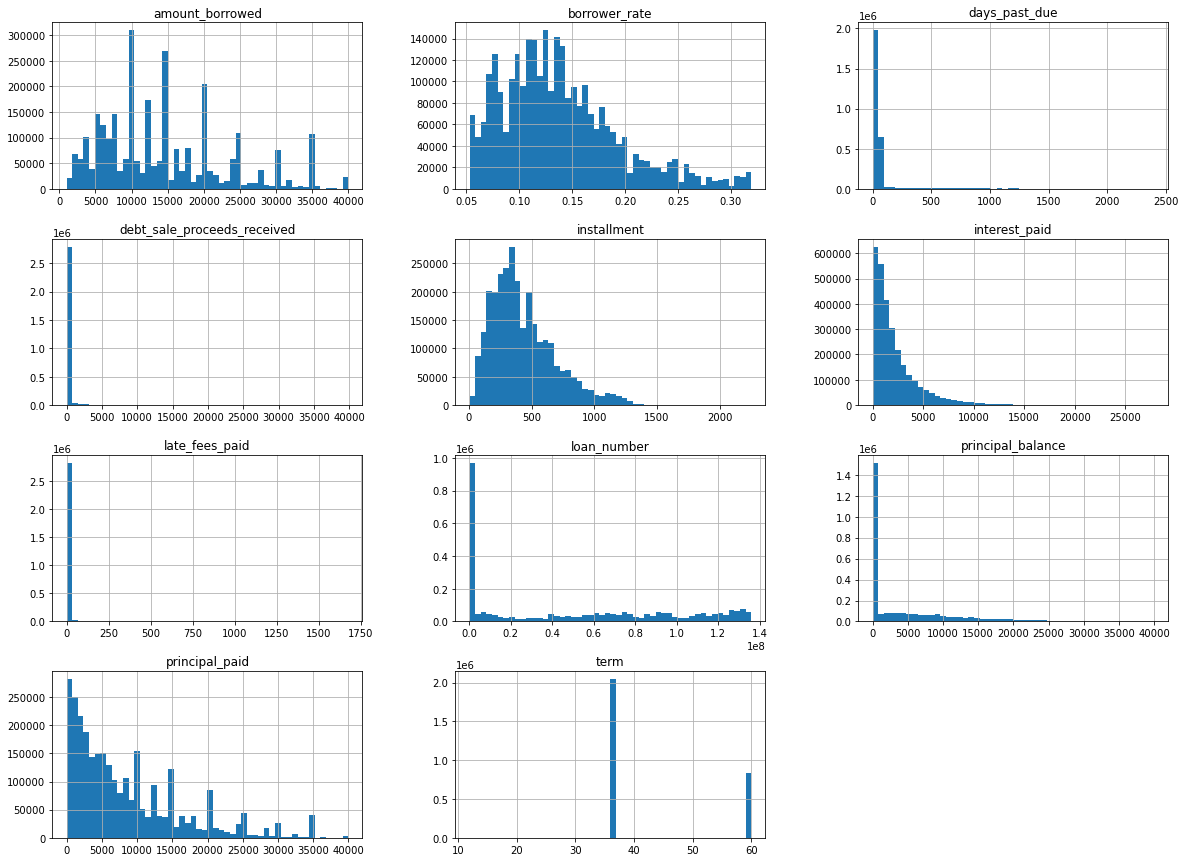

In [7]:
%matplotlib inline
data.hist(bins=50,figsize=(20,15))
plt.show()

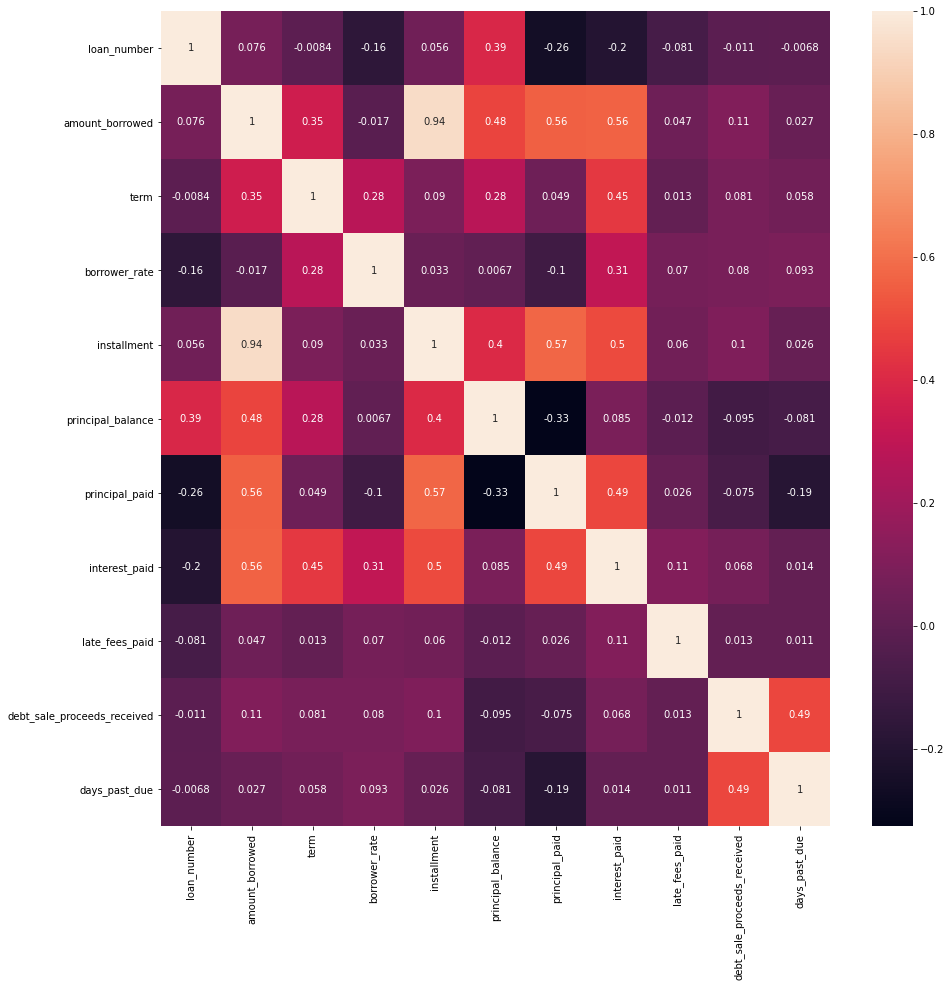

In [9]:
corrMatrix  = data.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrMatrix, annot=True, ax=ax)


In [ ]:
pd.plotting.scatter_matrix(data[["loan_number","amount_borrowed","principal_paid","interest_paid"]], alpha=0.2)

In [ ]:
sns.scatterplot(data=data,x="amount_borrowed",y="term", hue = "grade")

In [ ]:
sns.scatterplot(data=data,x="interest_paid",y="amount_borrowed", hue = "grade")